## PART 2: EDA

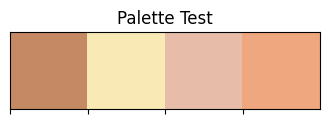

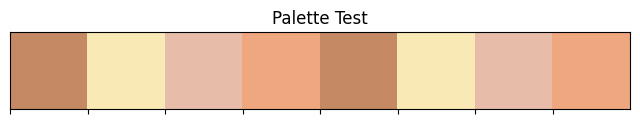

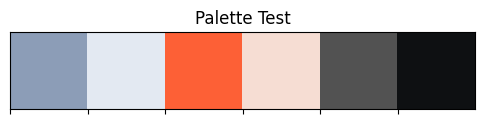

In [ ]:
# 팔레트 색상 테스트
beauty_palette = ['#C58A63', '#F8E9B5', '#E7BCA9', '#EEA77E']
market_palette = ["#003f5c", "#214876", "#4e4c8a", "#7e4a93", "#ae448d", "#d63e7a", "#f1465d", "#fd6036"]
market_palette =  [color for color, _ in zip(cycle(beauty_palette), range(len(market_palette)))]

skin_palette = ['#8C9DB7', '#E3E9F2', '#FD6036','#F6DDD3', '#525252', '#0E1012']
custom_cmap = LinearSegmentedColormap.from_list("custom_palette", market_palette)

sns.palplot(beauty_palette)
plt.title("Palette Test")
plt.show()

sns.palplot(market_palette)
plt.title("Palette Test")
plt.show()

sns.palplot(skin_palette)
plt.title("Palette Test")
plt.show()

### 시각화(Amazon 리뷰 데이터)

#### 브랜드 분포 확인

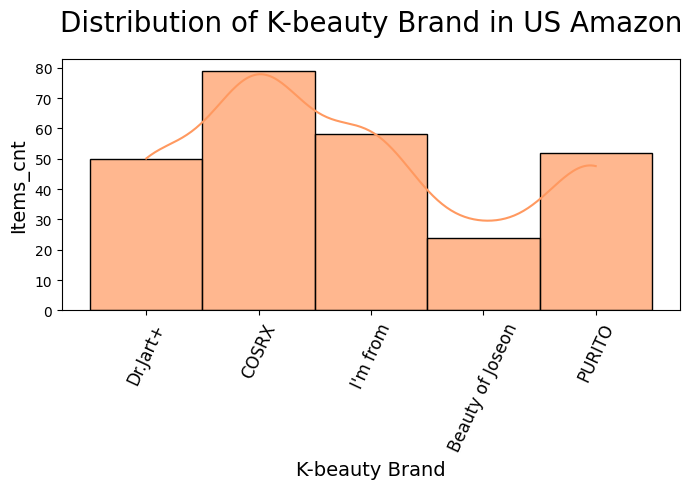

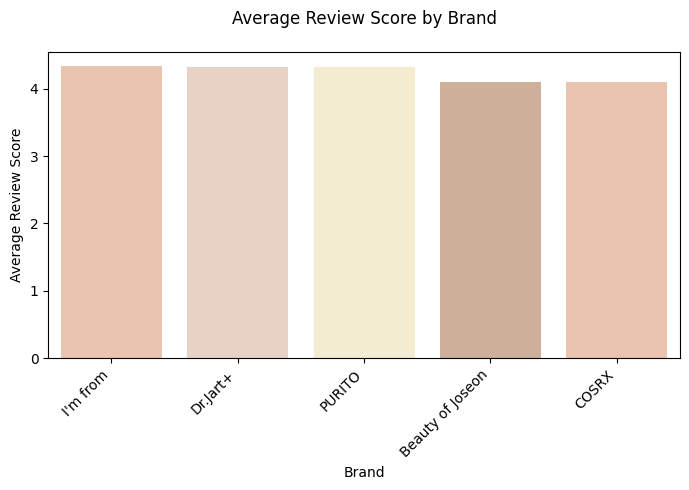

In [ ]:
# 브랜드별 아이템 분포
plt.figure(figsize=(7,5))
sns.histplot(data=amazon_items_df['brand'], bins=5, alpha=0.7, color='#FF9960', kde=True)
plt.title('Distribution of K-beauty Brand in US Amazon', fontsize=20, pad=20)

plt.xticks(rotation=65, fontsize=12)
plt.xlabel('K-beauty Brand', fontsize=14)
plt.ylabel('Items_cnt', fontsize=14)

plt.tight_layout()
plt.show()

# 브랜드별 평균 리뷰 평점
filtered_df = amazon_df[['brand', 'review_rating']].copy()

filtered_df['review_rating'] = pd.to_numeric(filtered_df['review_rating'], errors='coerce')
filtered_df.dropna(subset=['brand', 'review_rating'], inplace=True)

brand_review_score = pd.pivot_table(
    filtered_df,
    index=['brand'],
    values='review_rating',
    aggfunc='mean'
)
brand_review_score = brand_review_score.reset_index().sort_values(by='review_rating', ascending=False)
brand_review_score.reset_index(inplace=True, drop=True)
brand_review_score[:20]

brand_review_score.head(2)

plt.figure(figsize=(7, 5))
sns.barplot(data=brand_review_score, x='brand', y='review_rating', dodge=False, palette=market_palette[-1::-1], alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.title('Average Review Score by Brand', pad=20)
plt.ylabel('Average Review Score')
plt.xlabel('Brand')
plt.tight_layout()
plt.show()

# 브랜드별 평균 평점 시각화
df = brand_review_score
fig = go.Figure(data=[go.Table(
    header=dict(values=df.columns, fill_color='paleturquoise', align='center'),
    cells=dict(values=[df[col] for col in df.columns], fill_color='lavender', align='center'))
])
fig.update_layout(width=700,height=350)
fig.update_layout(title='Brand Review Scores')
fig.show()

#### 가격 분포 확인

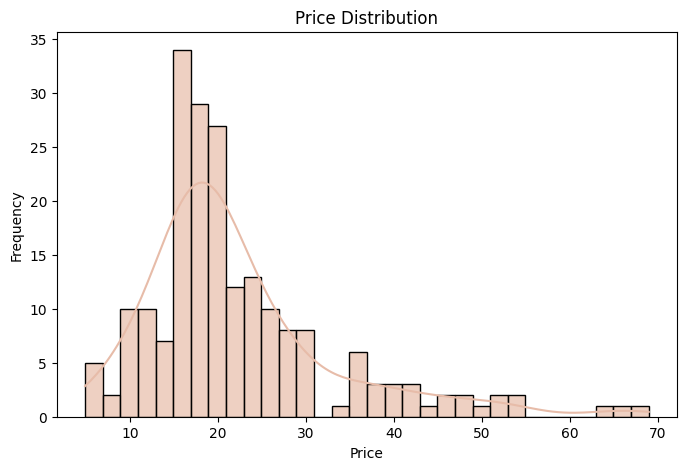

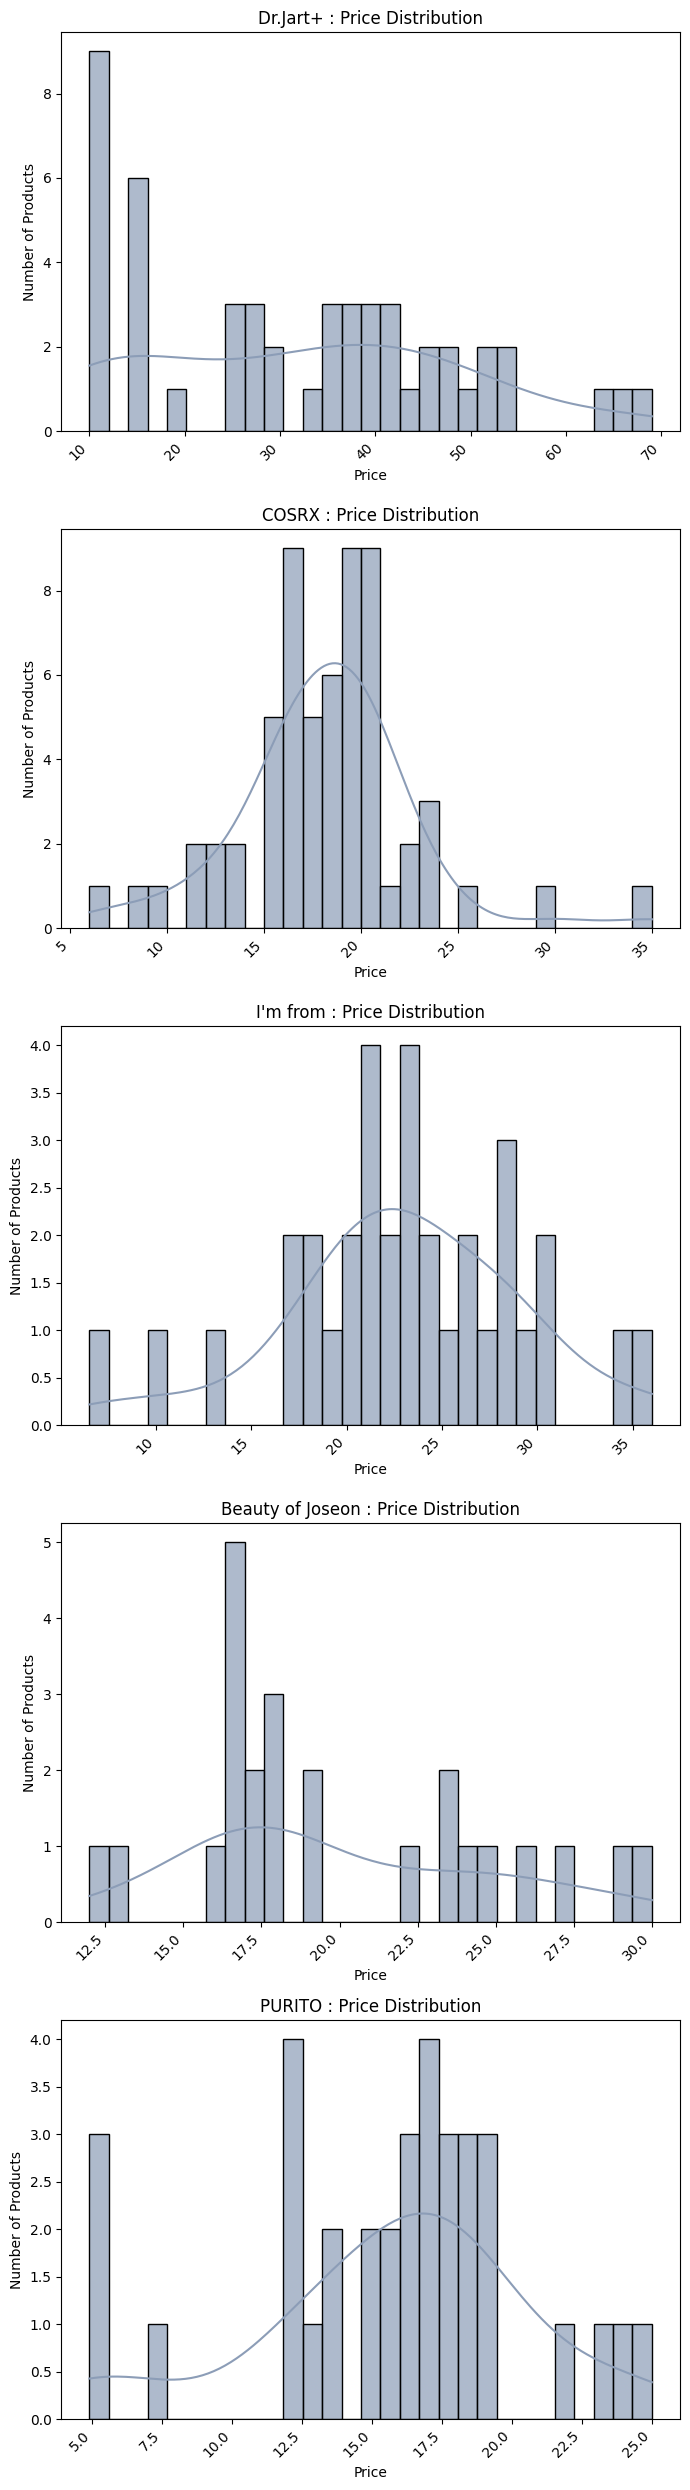

In [ ]:
# 가격 분포
plt.figure(figsize=(8, 5))
sns.histplot(amazon_items_df['price'].dropna(), bins=32, kde=True, color='#E7BCA9', alpha=0.7)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# 브랜드별 가격 분포 계산을 위한 변수 설정
category_dr_counts = amazon_items_df[amazon_items_df['brand']=='Dr.Jart+']
category_cs_counts = amazon_items_df[amazon_items_df['brand']=='COSRX']
category_if_counts = amazon_items_df[amazon_items_df['brand']=="I'm from"]
category_bj_counts = amazon_items_df[amazon_items_df['brand']=='Beauty of Joseon']
category_pu_counts = amazon_items_df[amazon_items_df['brand']=='PURITO']

# 브랜드별 가격 분포
plt.figure(figsize=(7, 25))

plt.subplot(5, 1, 1)
sns.histplot(category_dr_counts['price'].dropna(), bins=29, kde=True, alpha=0.7, color='#8C9DB7')
plt.title('Dr.Jart+ : Price Distribution')
plt.xlabel('Price')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')

plt.subplot(5, 1, 2)
sns.histplot(category_cs_counts['price'].dropna(), bins=29, kde=True, alpha=0.7, color='#8C9DB7')
plt.title('COSRX : Price Distribution')
plt.xlabel('Price')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')

plt.subplot(5, 1, 3)
sns.histplot(category_if_counts['price'].dropna(), bins=29, kde=True, alpha=0.7, color='#8C9DB7')
plt.title("I'm from : Price Distribution")
plt.xlabel('Price')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')

plt.subplot(5, 1, 4)
sns.histplot(category_bj_counts['price'].dropna(), bins=29, kde=True, alpha=0.7, color='#8C9DB7')
plt.title('Beauty of Joseon : Price Distribution')
plt.xlabel('Price')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')

plt.subplot(5, 1, 5)
sns.histplot(category_pu_counts['price'].dropna(), bins=29, kde=True, alpha=0.7, color='#8C9DB7')
plt.title('PURITO : Price Distribution')
plt.xlabel('Price')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

#### 평균 평점 분포 확인

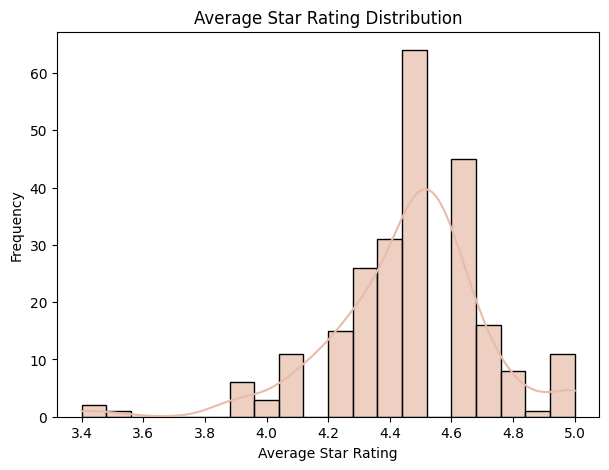

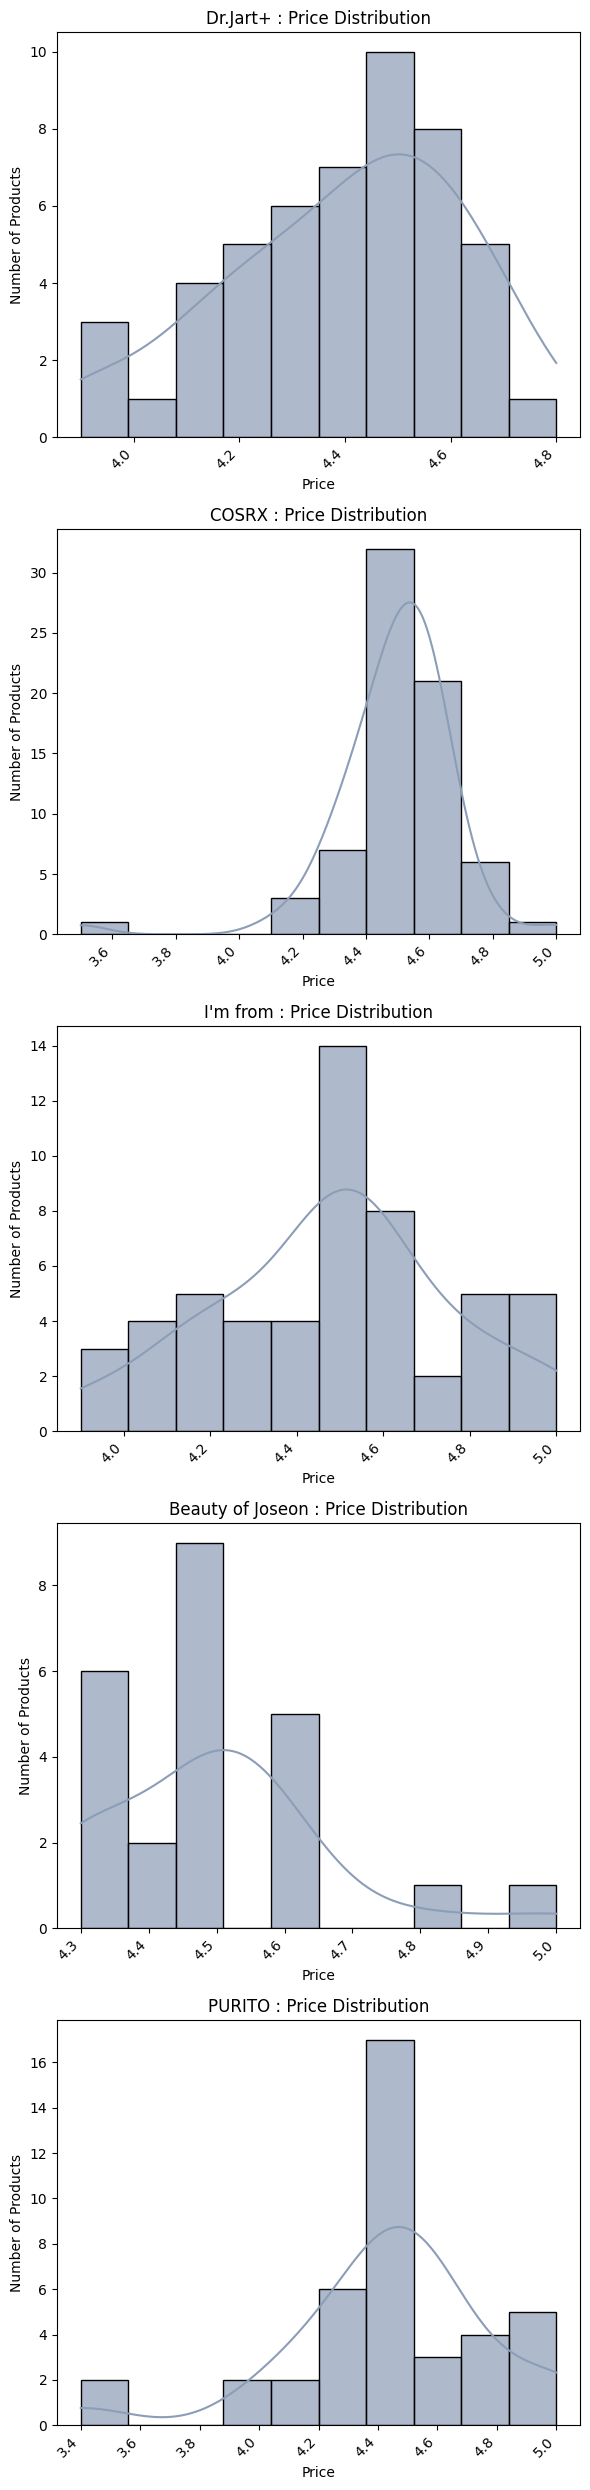

In [ ]:
plt.figure(figsize=(7, 5))

# 평균 별점 분포
sns.histplot(amazon_items_df['total_star_mean'], bins=20, kde=True, color='#E7BCA9', alpha=0.7)
plt.title('Average Star Rating Distribution')
plt.xlabel('Average Star Rating')
plt.ylabel('Frequency')
plt.show()

# 브랜드별 가격 분포 계산을 위한 변수 설정
category_dr_counts = amazon_items_df[amazon_items_df['brand']=='Dr.Jart+']
category_cs_counts = amazon_items_df[amazon_items_df['brand']=='COSRX']
category_if_counts = amazon_items_df[amazon_items_df['brand']=="I'm from"]
category_bj_counts = amazon_items_df[amazon_items_df['brand']=='Beauty of Joseon']
category_pu_counts = amazon_items_df[amazon_items_df['brand']=='PURITO']

# 브랜드별 가격 분포
plt.figure(figsize=(6, 25))

plt.subplot(5, 1, 1)
sns.histplot(category_dr_counts['total_star_mean'].dropna(), bins=10, kde=True, alpha=0.7, color='#8C9DB7')
plt.title('Dr.Jart+ : Price Distribution')
plt.xlabel('Price')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')

plt.subplot(5, 1, 2)
sns.histplot(category_cs_counts['total_star_mean'].dropna(), bins=10, kde=True, alpha=0.7, color='#8C9DB7')
plt.title('COSRX : Price Distribution')
plt.xlabel('Price')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')

plt.subplot(5, 1, 3)
sns.histplot(category_if_counts['total_star_mean'].dropna(), bins=10, kde=True, alpha=0.7, color='#8C9DB7')
plt.title("I'm from : Price Distribution")
plt.xlabel('Price')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')

plt.subplot(5, 1, 4)
sns.histplot(category_bj_counts['total_star_mean'].dropna(), bins=10, kde=True, alpha=0.7, color='#8C9DB7')
plt.title('Beauty of Joseon : Price Distribution')
plt.xlabel('Price')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')

plt.subplot(5, 1, 5)
sns.histplot(category_pu_counts['total_star_mean'].dropna(), bins=10, kde=True, alpha=0.7, color='#8C9DB7')
plt.title('PURITO : Price Distribution')
plt.xlabel('Price')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

#### 제품 유형별 분포 확인

In [ ]:
# K-beauty 카테고리 별 리뷰 개수
amc_count = pd.DataFrame(amazon_df.Amazon_Category.value_counts())
amc_count.reset_index(inplace=True)
amc_count.columns = ['Amazon_Category', 'Count']
print('카테고리 별 리뷰 개수')
display(amc_count.head())

# K-beauty 하위 카테고리 리뷰 개수
amsc_count = pd.DataFrame(amazon_df.Sub_Category_Name.value_counts())
amsc_count.reset_index(inplace=True)
amsc_count.columns = ['Sub_Category', 'Count']
print('하위 카테고리 별 리뷰 개수')
display(amsc_count.head())

카테고리 별 리뷰 개수


,Amazon_Category,Count
0,Skin Care Products,11989
1,Makeup,755
2,"Foot, Hand & Nail Care Products",45
3,Beauty Tools & Accessories,8


하위 카테고리 별 리뷰 개수


,Sub_Category,Count
0,Facial Serums,2816
1,Face Moisturizers,2115
2,Facial Toners & Astr,1654
3,Facial Masks,1498
4,Facial Cleans,1242


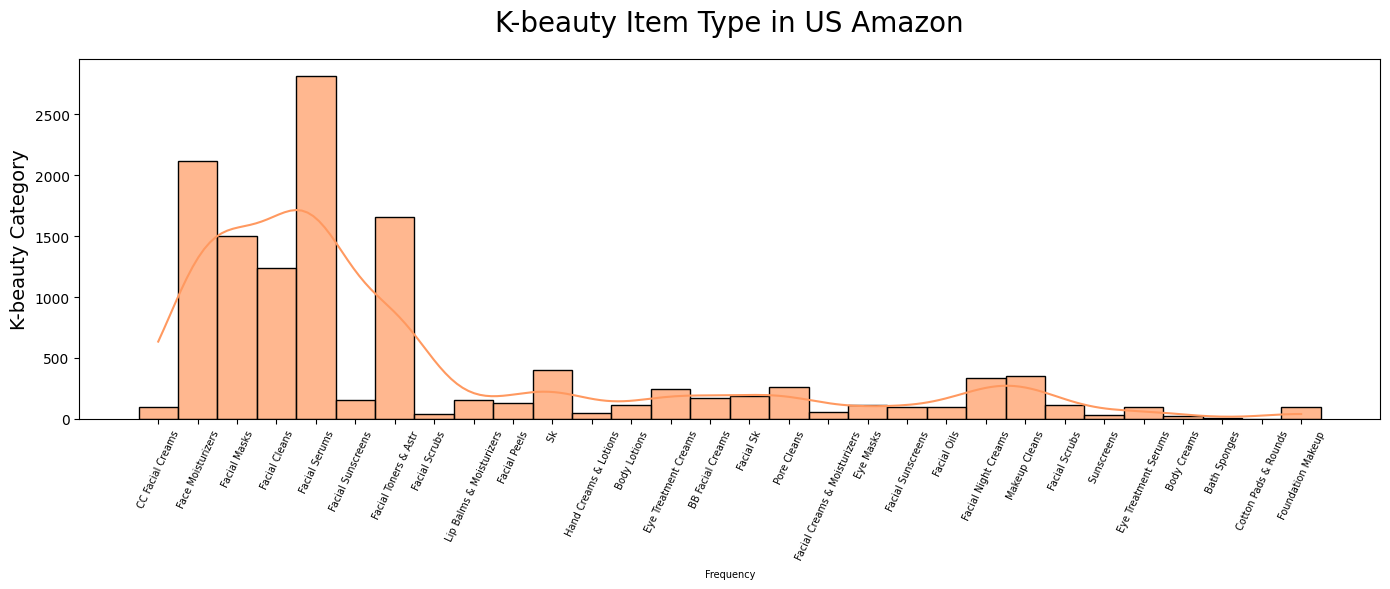

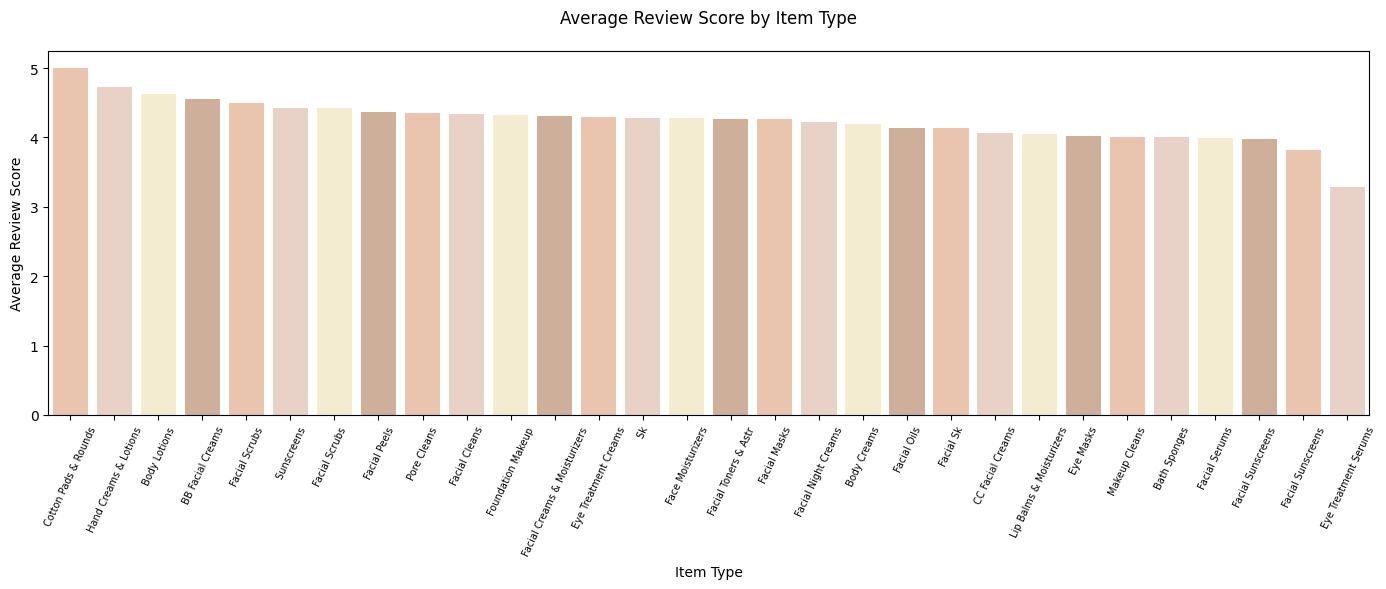

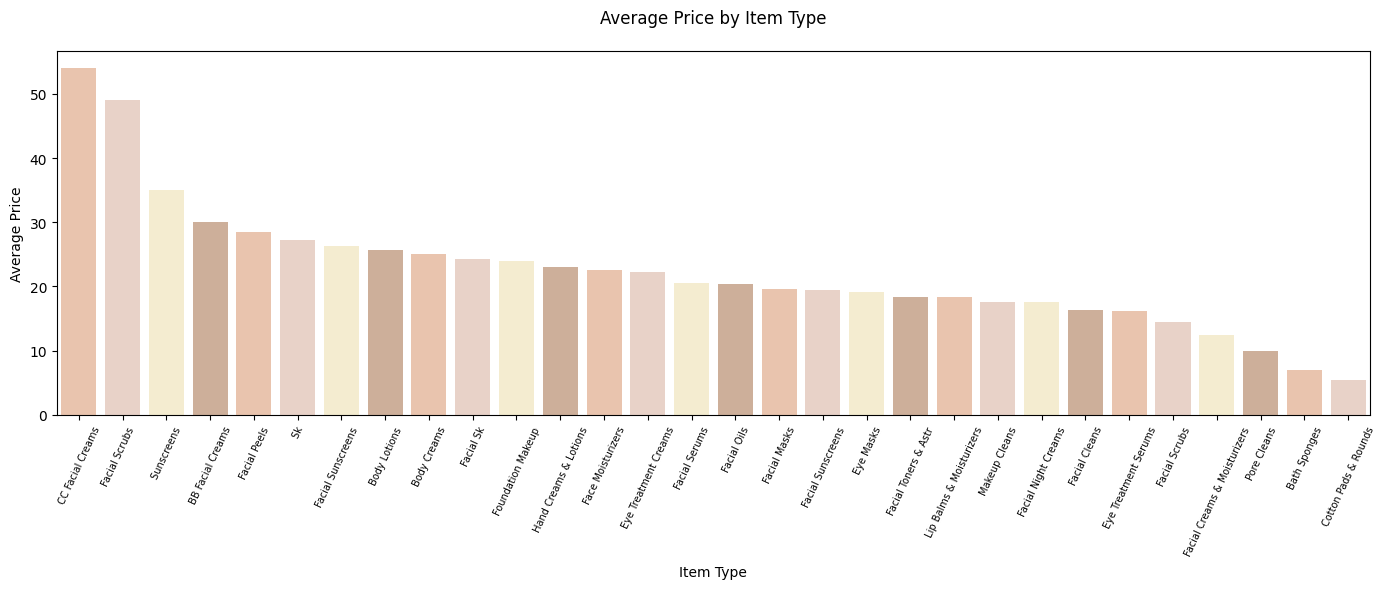

In [ ]:
# 제품 유형 분포
plt.figure(figsize=(14,6))
sns.histplot(data=amazon_df['Sub_Category_Name'], bins=31, alpha=0.7, color='#FF9960', kde=True)
plt.title('K-beauty Item Type in US Amazon', fontsize=20, pad=20)

plt.xticks(rotation=65, fontsize=7)
plt.xlabel('Frequency', fontsize=7)
plt.ylabel('K-beauty Category', fontsize=14)
plt.tight_layout()
plt.show()

# 제품 유형 별 평균 평점
category_mean = pd.pivot_table(amazon_df, index=['Sub_Category_Name'], values='review_rating',aggfunc='mean')
category_mean = category_mean.reset_index().sort_values(by='review_rating', ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(data=category_mean, x='Sub_Category_Name', y='review_rating', dodge=False, palette=market_palette[-1::-1], alpha=0.7)
plt.xticks(rotation=65, fontsize=7)
plt.title('Average Review Score by Item Type', pad=20)
plt.ylabel('Average Review Score')
plt.xlabel('Item Type')
plt.tight_layout()
plt.show()

# 제품 유형 별 평균 가격
price_mean = pd.pivot_table(amazon_df, index=['Sub_Category_Name'], values='price',aggfunc='mean')
price_mean = price_mean.reset_index().sort_values(by='price', ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(data=price_mean, x='Sub_Category_Name', y='price', dodge=False, palette=market_palette[-1::-1], alpha=0.7)
plt.xticks(rotation=65, fontsize=7)
plt.title('Average Price by Item Type', pad=20)
plt.ylabel('Average Price')
plt.xlabel('Item Type')
plt.tight_layout()
plt.show()

#### 리뷰 분포 확인

In [ ]:
# 브랜드 별 리뷰 개수
k_brand_count = pd.DataFrame(amazon_df.brand.value_counts())
k_brand_count.reset_index(inplace=True)
print('브랜드 별 리뷰 개수')
display(k_brand_count)

브랜드 별 리뷰 개수


,brand,count
0,COSRX,5189
1,PURITO,2388
2,I'm from,1779
3,Dr.Jart+,1771
4,Beauty of Joseon,1670


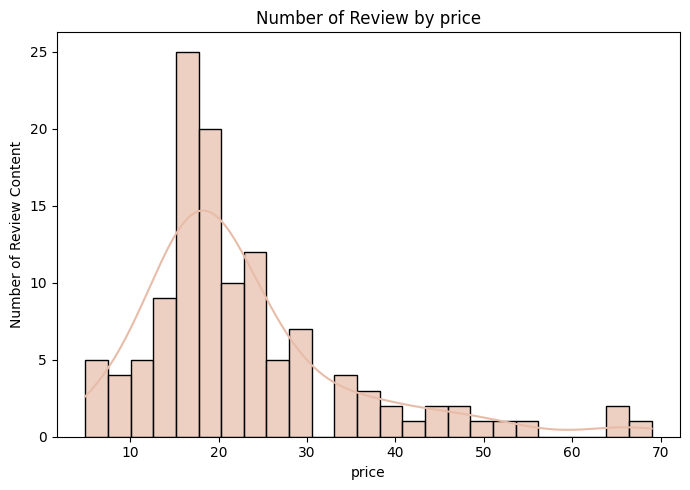

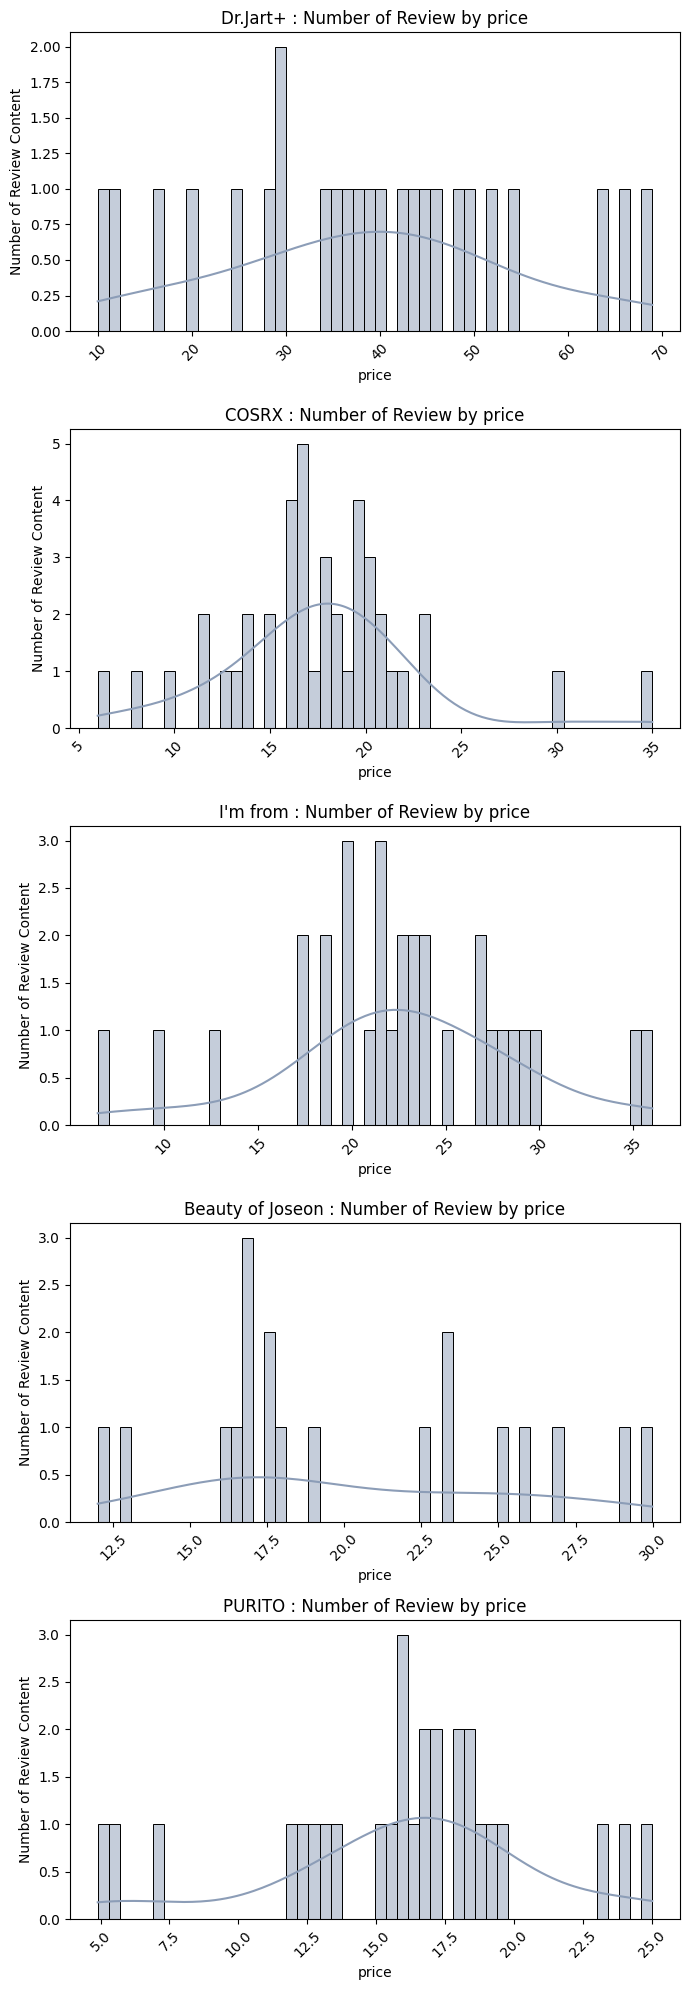

In [ ]:
# 전체 가격대별 리뷰수
price_reviews_cnt = amazon_df.groupby(['price'])['review_content'].count().reset_index()

plt.figure(figsize=(7, 5))
sns.histplot(data=price_reviews_cnt, x='price', bins=25, kde=True, alpha=0.7, color='#E7BCA9')
plt.title('Number of Review by price')
plt.xlabel('price')
plt.ylabel('Number of Review Content')
plt.tight_layout()
plt.show()

# 브랜드 가격대별별 리뷰수
brand_price_reviews_cnt = amazon_df.groupby(['brand','price'])['review_content'].count().reset_index()

brand_price_reviews_cnt_dr = brand_price_reviews_cnt[brand_price_reviews_cnt['brand']=='Dr.Jart+'].reset_index()
brand_price_reviews_cnt_cs = brand_price_reviews_cnt[brand_price_reviews_cnt['brand']=='COSRX'].reset_index()
brand_price_reviews_cnt_if = brand_price_reviews_cnt[brand_price_reviews_cnt['brand']=="I'm from"].reset_index()
brand_price_reviews_cnt_bj = brand_price_reviews_cnt[brand_price_reviews_cnt['brand']=='Beauty of Joseon'].reset_index()
brand_price_reviews_cnt_pu = brand_price_reviews_cnt[brand_price_reviews_cnt['brand']=='PURITO'].reset_index()

plt.figure(figsize=(7, 20))

plt.subplot(5, 1, 1)
sns.histplot(data=brand_price_reviews_cnt_dr, x='price', bins=50, kde=True, color='#8C9DB7')
plt.title('Dr.Jart+ : Number of Review by price')
plt.xlabel('price')
plt.ylabel('Number of Review Content')
plt.xticks(rotation=45)

plt.subplot(5, 1, 2)
sns.histplot(data=brand_price_reviews_cnt_cs, x='price', bins=50, kde=True, color='#8C9DB7')
plt.title('COSRX : Number of Review by price')
plt.xlabel('price')
plt.ylabel('Number of Review Content')
plt.xticks(rotation=45)

plt.subplot(5, 1, 3)
sns.histplot(data=brand_price_reviews_cnt_if, x='price', bins=50, kde=True, color='#8C9DB7')
plt.title("I'm from : Number of Review by price")
plt.xlabel('price')
plt.ylabel('Number of Review Content')
plt.xticks(rotation=45)

plt.subplot(5, 1, 4)
sns.histplot(data=brand_price_reviews_cnt_bj, x='price', bins=50, kde=True, color='#8C9DB7')
plt.title('Beauty of Joseon : Number of Review by price')
plt.xlabel('price')
plt.ylabel('Number of Review Content')
plt.xticks(rotation=45)

plt.subplot(5, 1, 5)
sns.histplot(data=brand_price_reviews_cnt_pu, x='price', bins=50, kde=True, color='#8C9DB7')
plt.title('PURITO : Number of Review by price')
plt.xlabel('price')
plt.ylabel('Number of Review Content')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

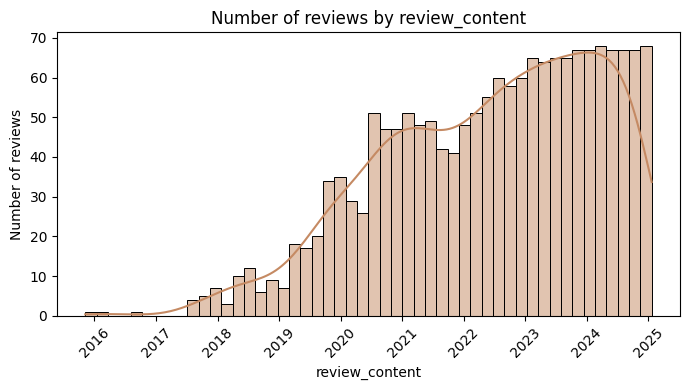

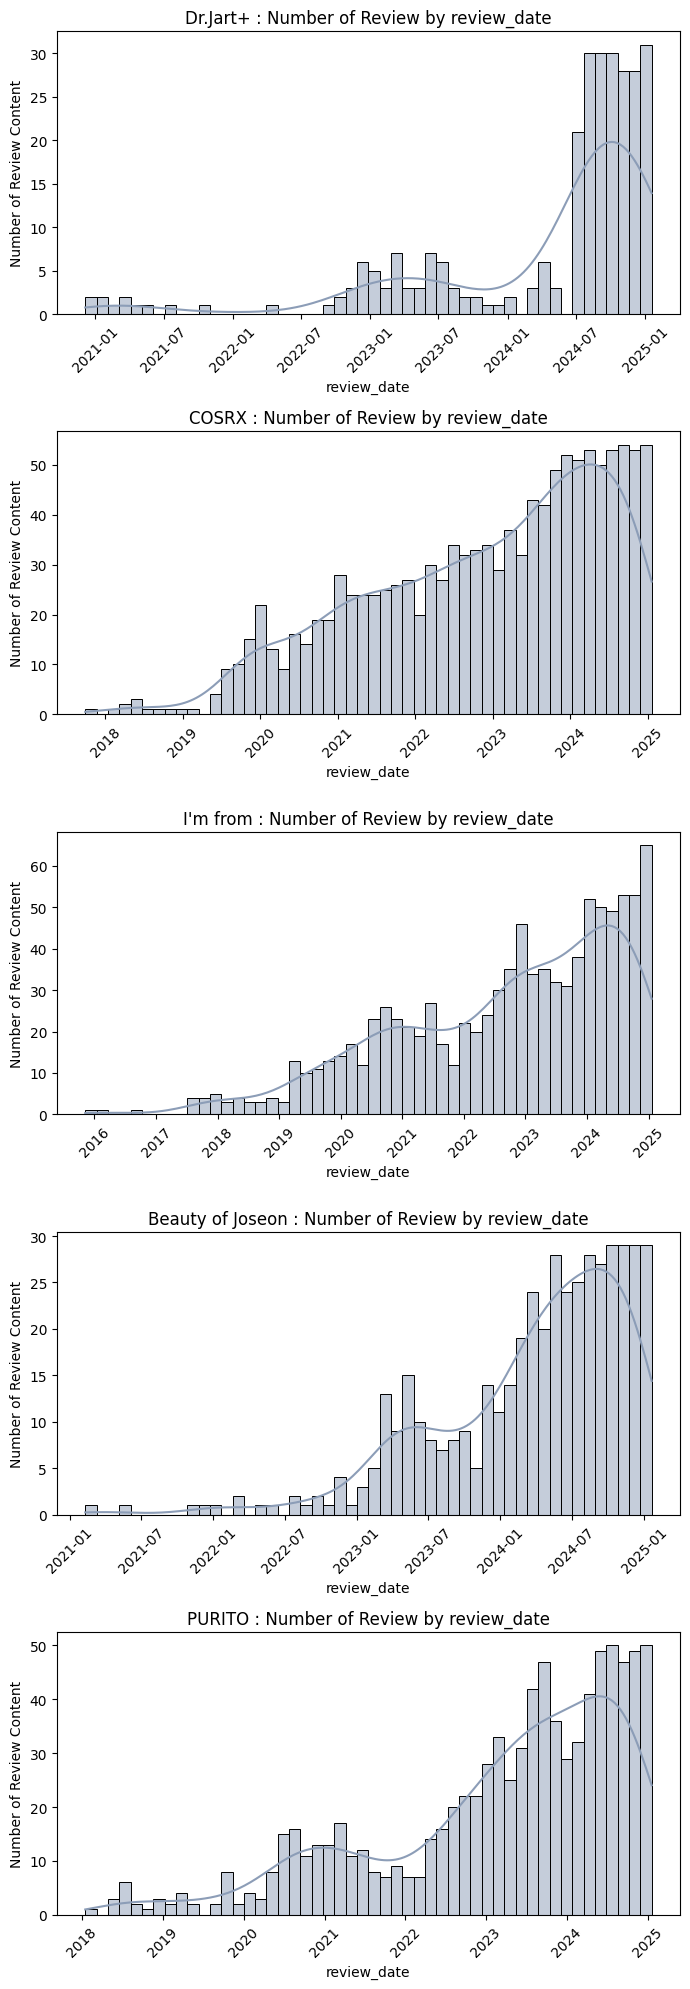

In [ ]:
# 기간별 리뷰수
date_reviews_cnt = amazon_df.groupby(['review_date'])['review_content'].count().reset_index()

plt.figure(figsize=(7, 4))
sns.histplot(data=date_reviews_cnt, x='review_date', bins=50, kde=True, color='#C58A63')
plt.title('Number of reviews by review_content')
plt.xlabel('review_content')
plt.ylabel('Number of reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 브랜드 기간별 리뷰수
brand_date_reviews_cnt = amazon_df.groupby(['brand','review_date'])['review_content'].count().reset_index()

brand_date_reviews_cnt_dr = brand_date_reviews_cnt[brand_date_reviews_cnt['brand']=='Dr.Jart+'].reset_index()
brand_date_reviews_cnt_cs = brand_date_reviews_cnt[brand_date_reviews_cnt['brand']=='COSRX'].reset_index()
brand_date_reviews_cnt_if = brand_date_reviews_cnt[brand_date_reviews_cnt['brand']=="I'm from"].reset_index()
brand_date_reviews_cnt_bj = brand_date_reviews_cnt[brand_date_reviews_cnt['brand']=='Beauty of Joseon'].reset_index()
brand_date_reviews_cnt_pu = brand_date_reviews_cnt[brand_date_reviews_cnt['brand']=='PURITO'].reset_index()

plt.figure(figsize=(7, 20))

plt.subplot(5, 1, 1)
sns.histplot(data=brand_date_reviews_cnt_dr, x='review_date', bins=50, kde=True, color='#8C9DB7')
plt.title('Dr.Jart+ : Number of Review by review_date')
plt.xlabel('review_date')
plt.ylabel('Number of Review Content')
plt.xticks(rotation=45)

plt.subplot(5, 1, 2)
sns.histplot(data=brand_date_reviews_cnt_cs, x='review_date', bins=50, kde=True, color='#8C9DB7')
plt.title('COSRX : Number of Review by review_date')
plt.xlabel('review_date')
plt.ylabel('Number of Review Content')
plt.xticks(rotation=45)

plt.subplot(5, 1, 3)
sns.histplot(data=brand_date_reviews_cnt_if, x='review_date', bins=50, kde=True, color='#8C9DB7')
plt.title("I'm from : Number of Review by review_date")
plt.xlabel('review_date')
plt.ylabel('Number of Review Content')
plt.xticks(rotation=45)

plt.subplot(5, 1, 4)
sns.histplot(data=brand_date_reviews_cnt_bj, x='review_date', bins=50, kde=True, color='#8C9DB7')
plt.title('Beauty of Joseon : Number of Review by review_date')
plt.xlabel('review_date')
plt.ylabel('Number of Review Content')
plt.xticks(rotation=45)

plt.subplot(5, 1, 5)
sns.histplot(data=brand_date_reviews_cnt_pu, x='review_date', bins=50, kde=True, color='#8C9DB7')
plt.title('PURITO : Number of Review by review_date')
plt.xlabel('review_date')
plt.ylabel('Number of Review Content')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### 상관관계 파악

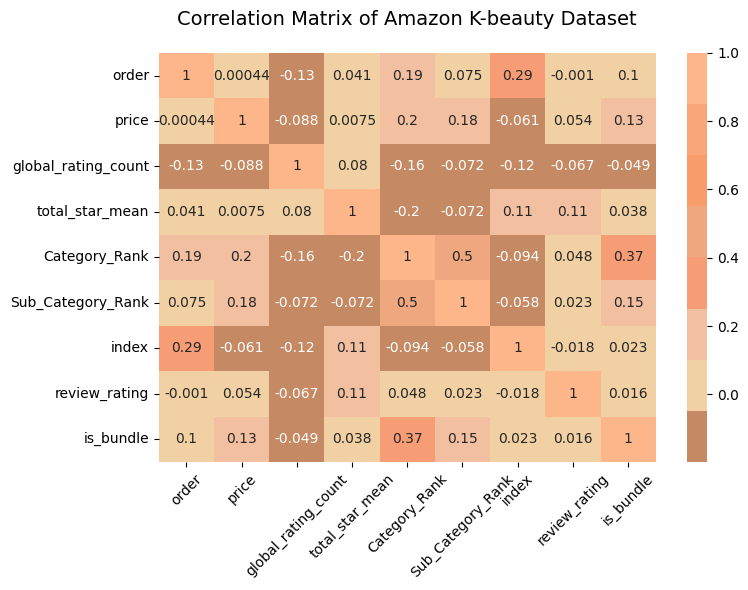

In [ ]:
# 전반적인 상관관계
ordinal_palette = [
    '#C58A63', 
    '#F1D0A3', 
    '#F2BFA1',  
    '#F69D75',  
    '#EEA77E',  
    '#F89C6B',  
    '#F9A67A',  
    '#FDB58A'
]

plt.close()

sns.reset_defaults()
plt.rcdefaults()
plt.style.use('default')
plt.figure(figsize=(8,6))

sample_data = amazon_df.select_dtypes(include=["number"])

#compute correlation
corr_matrix = sample_data.corr()
corr_matrix

#annot=True return the correlation values
sns.heatmap(corr_matrix, cmap=ordinal_palette, annot=True)
plt.xticks(rotation=45)
plt.title('Correlation Matrix of Amazon K-beauty Dataset', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

#### 워드 클라우드

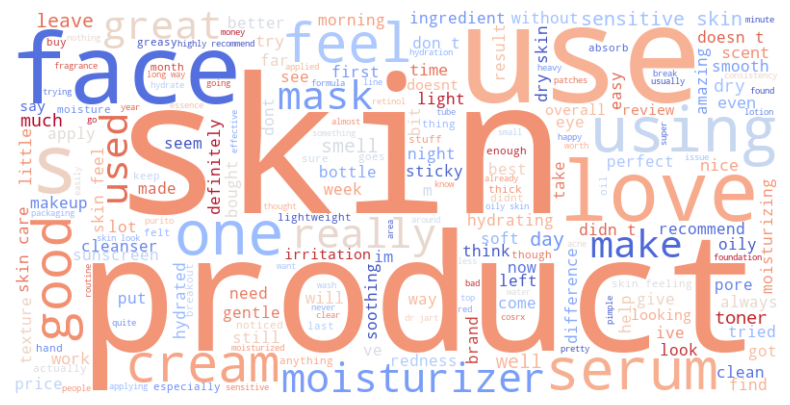

In [ ]:
# 전처리된 아마존 모든 리뷰 워드 클라우드
wordcloud = WordCloud(width=800, height=400, 
                      background_color='white', colormap='coolwarm').generate(' '.join(amazon_df['cleaned_review'].dropna()))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

'Dr.Jart+'

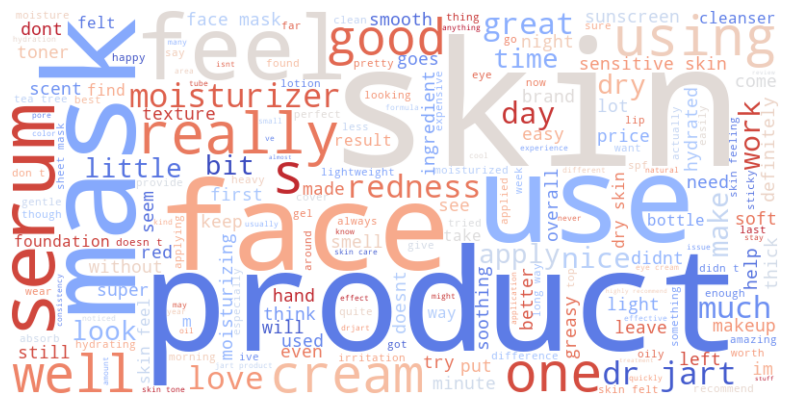

'COSRX'

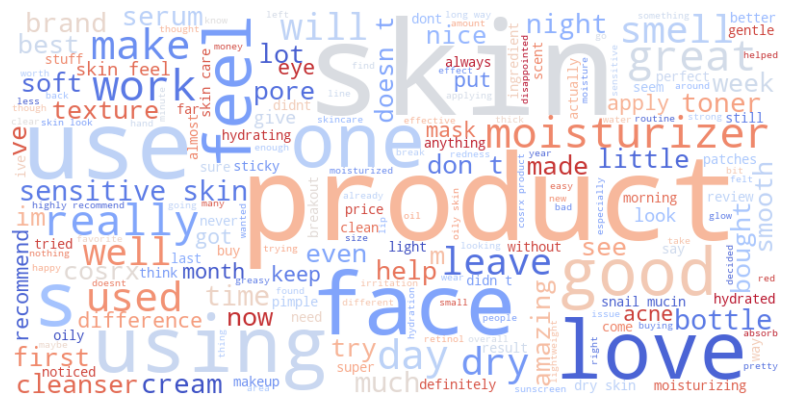

'Beauty of Joseon'

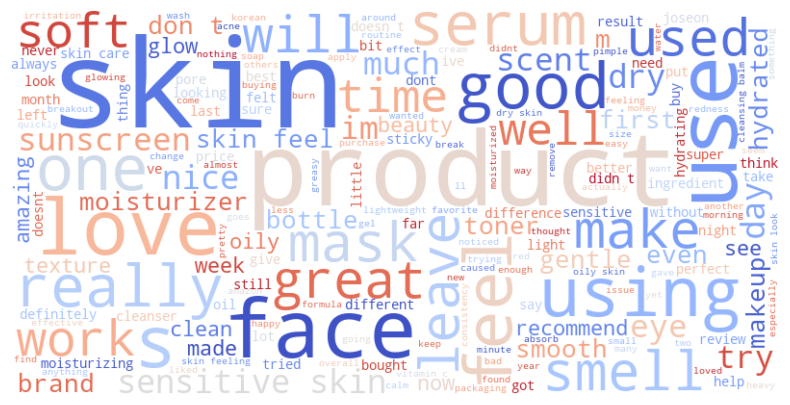

"I'm from"

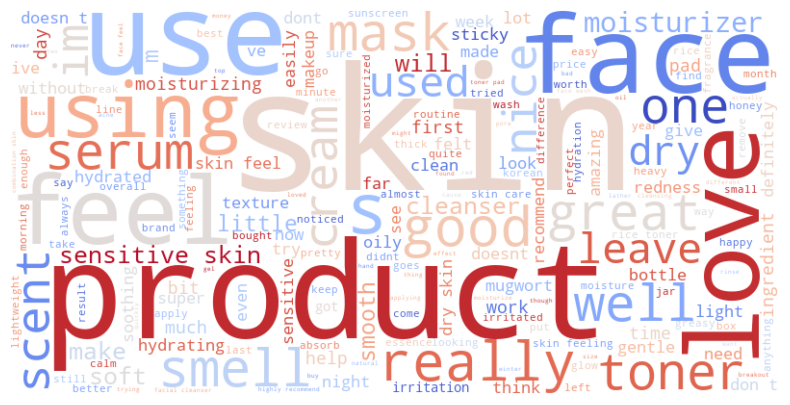

'PURITO'

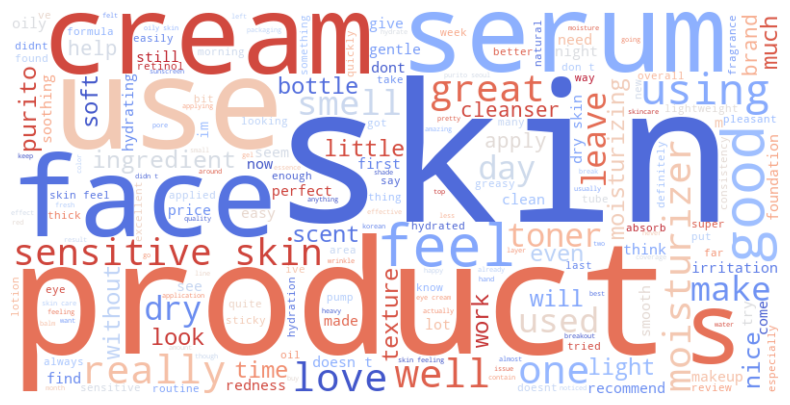

In [ ]:
amazon_df_dr = amazon_df[amazon_df['brand']=='Dr.Jart+']
amazon_df_cs = amazon_df[amazon_df['brand']=='COSRX']
amazon_df_bj = amazon_df[amazon_df['brand']=="Beauty of Joseon"]
amazon_df_if = amazon_df[amazon_df['brand']=="I'm from"]
amazon_df_pu = amazon_df[amazon_df['brand']=='PURITO']
amazon_df_list = [amazon_df_dr, amazon_df_cs,amazon_df_bj,amazon_df_if,amazon_df_pu]
brand_title_list = ['Dr.Jart+', 'COSRX', "Beauty of Joseon", "I'm from", 'PURITO']

for i in range(len(amazon_df_list)) :
    wordcloud = WordCloud(width=800, height=400, 
                      background_color='white', colormap='coolwarm').generate(' '.join(amazon_df_list[i]['cleaned_review'].dropna()))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    display(brand_title_list[i])
    plt.show()

### 시각화(Skinsort 데이터)

In [ ]:
# Skinsort 데이터의 국가별 브랜드 수
country_dist = skinsort_copy['country'].value_counts().reset_index()
country_dist.columns = ['Country', 'Count']

fig = px.pie(country_dist[:15], values='Count', names='Country', title=f"Country Distribution for Skinsort Brand Data")
fig.update_traces(hole=.3)
fig.update_layout(width=700,height=350)
fig.show()

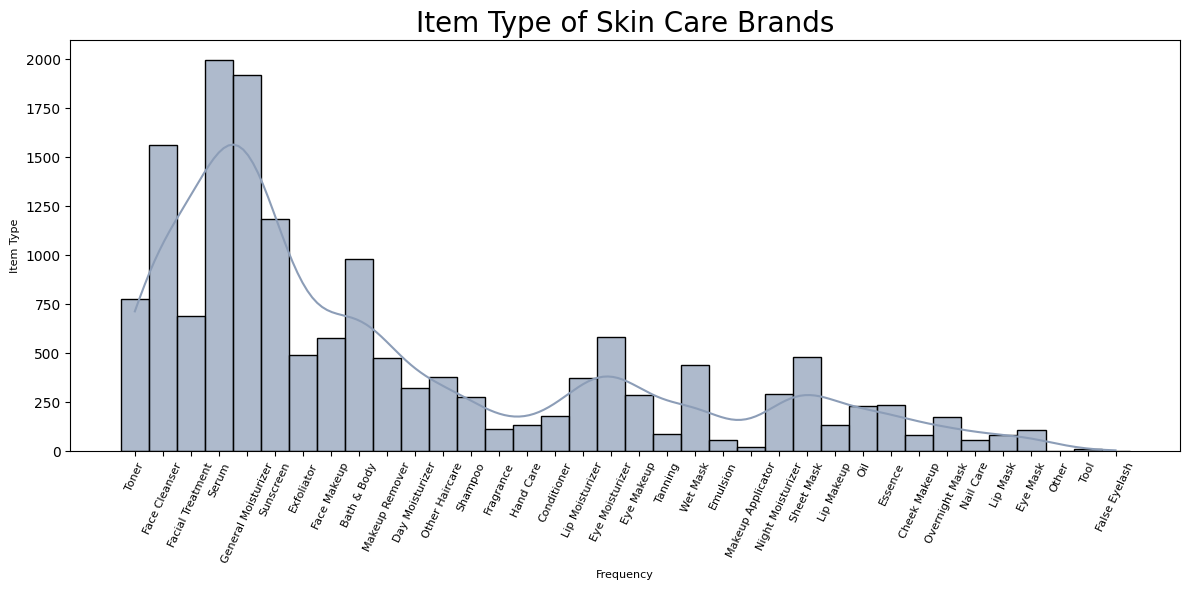

In [ ]:
# 카테고리 분포
plt.figure(figsize=(12,6))
sns.histplot(data=skinsort_copy['type'], bins=31, alpha=0.7, color='#8C9DB7', kde=True)
plt.title('Item Type of Skin Care Brands', fontsize=20)

plt.xticks(rotation=65, fontsize=8)
plt.xlabel('Frequency', fontsize=8)
plt.ylabel('Item Type', fontsize=8)

plt.tight_layout()
plt.show()

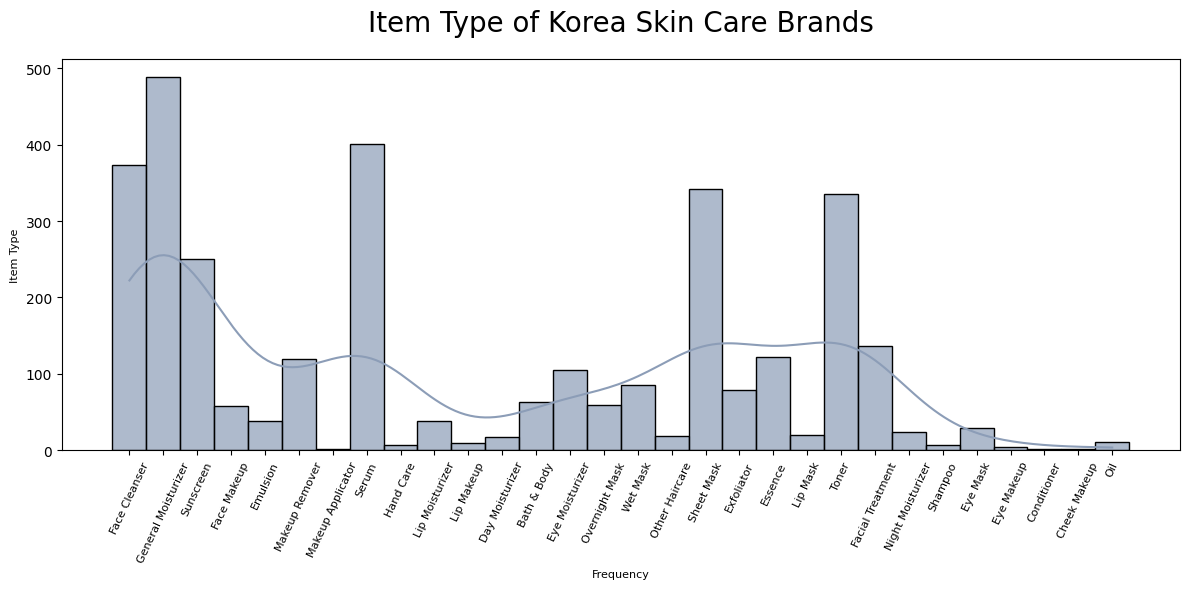

In [ ]:
# 한국 스킨케어 브랜드들의 제품 타입 분포
# skincare 데이터셋 활용
query_cond = "country == 'South Korea'"
k_skin_brand = skinsort_copy.query(query_cond).reset_index()
k_skin_brand.drop(columns='index', inplace=True)
k_skin_brand.head(2)

plt.figure(figsize=(12,6))

sns.histplot(data=k_skin_brand['type'], bins=31, alpha=0.7, color='#8C9DB7', kde=True)
plt.title('Item Type of Korea Skin Care Brands', fontsize=20, pad=20)

plt.xticks(rotation=65, fontsize=8)
plt.xlabel('Frequency', fontsize=8)
plt.ylabel('Item Type', fontsize=8)

plt.tight_layout()
plt.show()

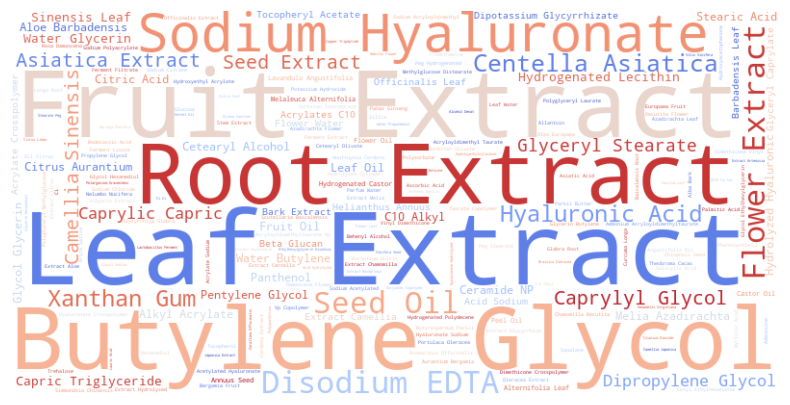

In [ ]:
# 한국 스킨케어 브랜드 성분
wordcloud = WordCloud(width=800, height=400, 
                      background_color='white', colormap='coolwarm').generate(' '.join(k_skin_brand['ingridients'].dropna()))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()